In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas 
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pandas.read_csv("reviews.csv", parse_dates=['Timestamp'])
data.head(5)

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [3]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).count()
day_average.head()

,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15


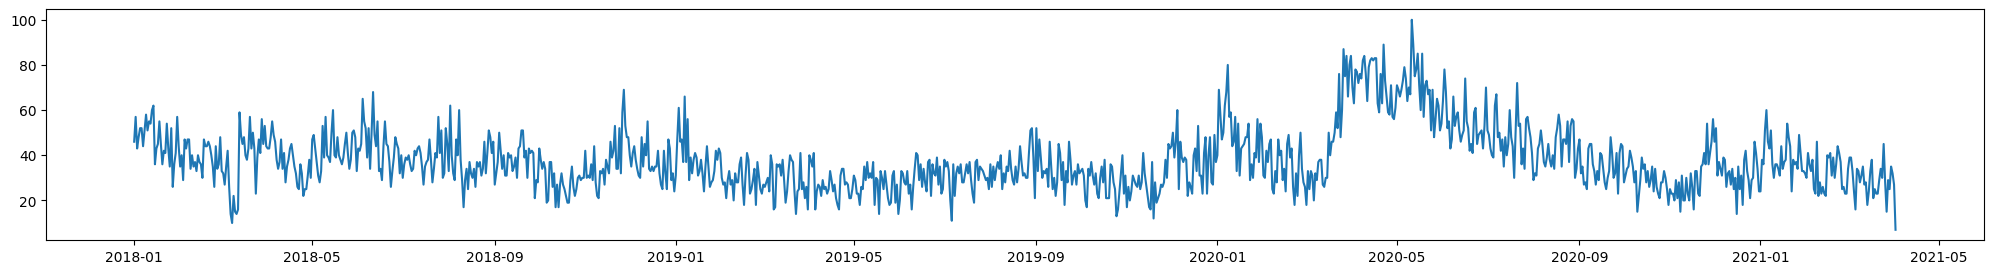

In [4]:
plt.figure(figsize=(25, 3))
plt.plot(day_average.index, day_average['Rating'])

### Average rating by week

C:\Users\zecil\AppData\Local\Temp\ipykernel_2672\836729691.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  week_avg = data.groupby(['Week']).mean()


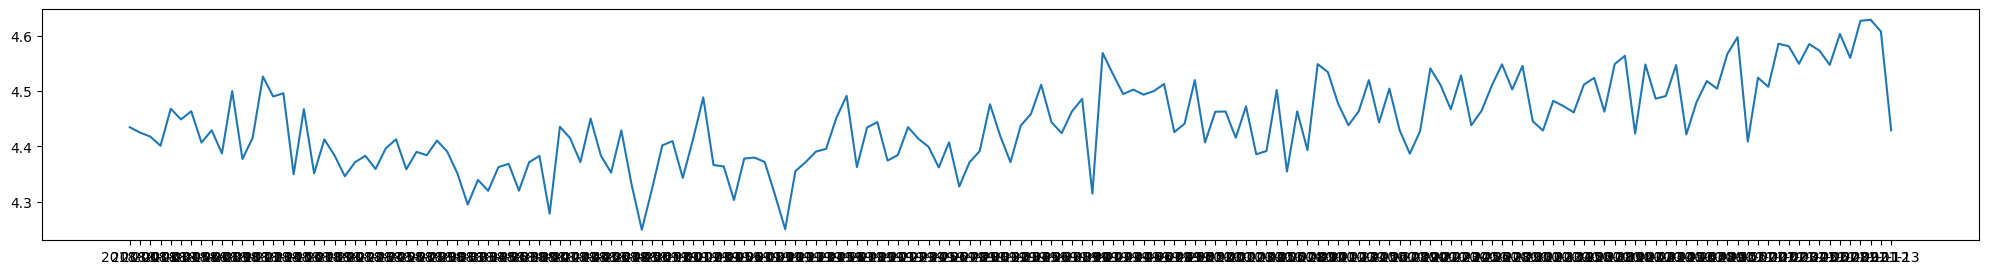

In [5]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_avg = data.groupby(['Week']).mean()

plt.figure(figsize=(25, 3))
plt.plot(week_avg.index, week_avg['Rating'])

### Average rating by month

C:\Users\zecil\AppData\Local\Temp\ipykernel_2672\1816900788.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_avg = data.groupby(['Month']).mean()


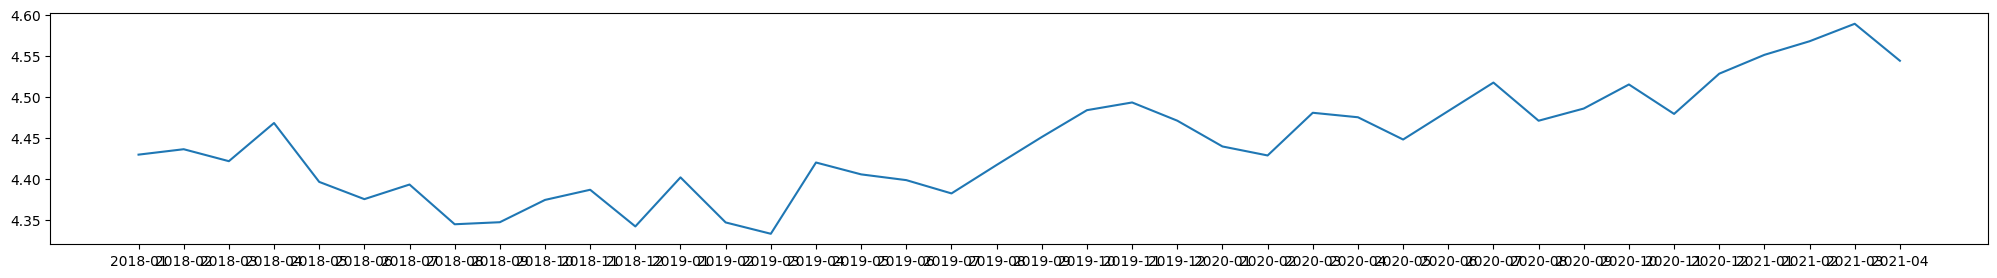

In [6]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_avg = data.groupby(['Month']).mean()

plt.figure(figsize=(25, 3))
plt.plot(month_avg.index, month_avg['Rating'])

### Average rating by month by course

<AxesSubplot: xlabel='Month'>

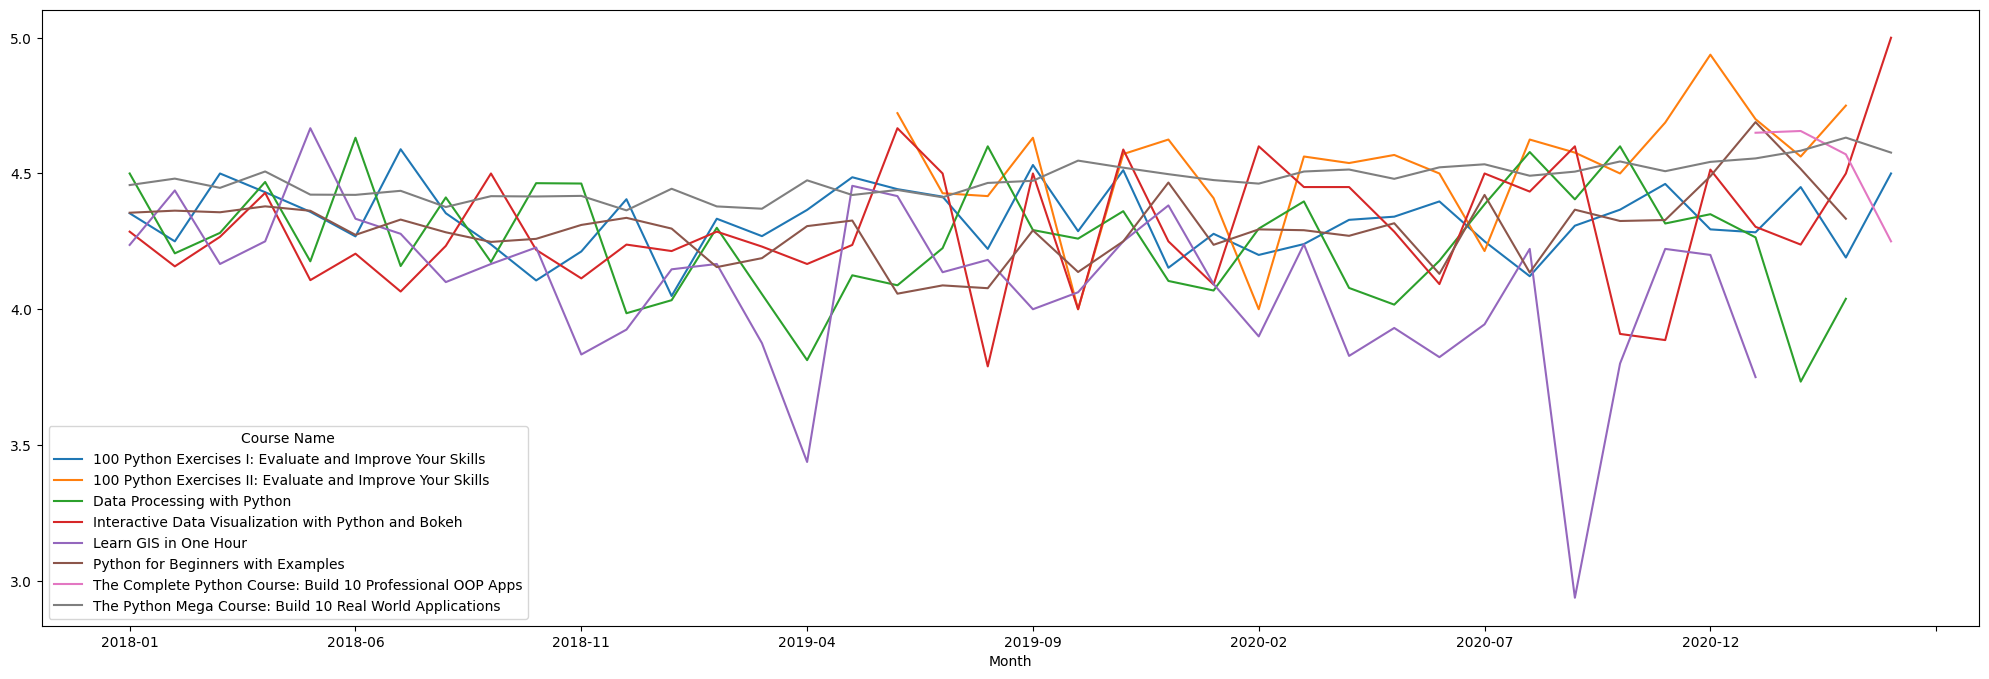

In [7]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
mnth_avg_crs = data.groupby(['Month', 'Course Name'])['Rating'].mean().unstack()


mnth_avg_crs.plot(figsize=(25, 8))

### Which day of the week are people the happiest?

C:\Users\zecil\AppData\Local\Temp\ipykernel_2672\4041916209.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekday_avg = data.groupby(['Weekday', 'Daynumber']).mean()


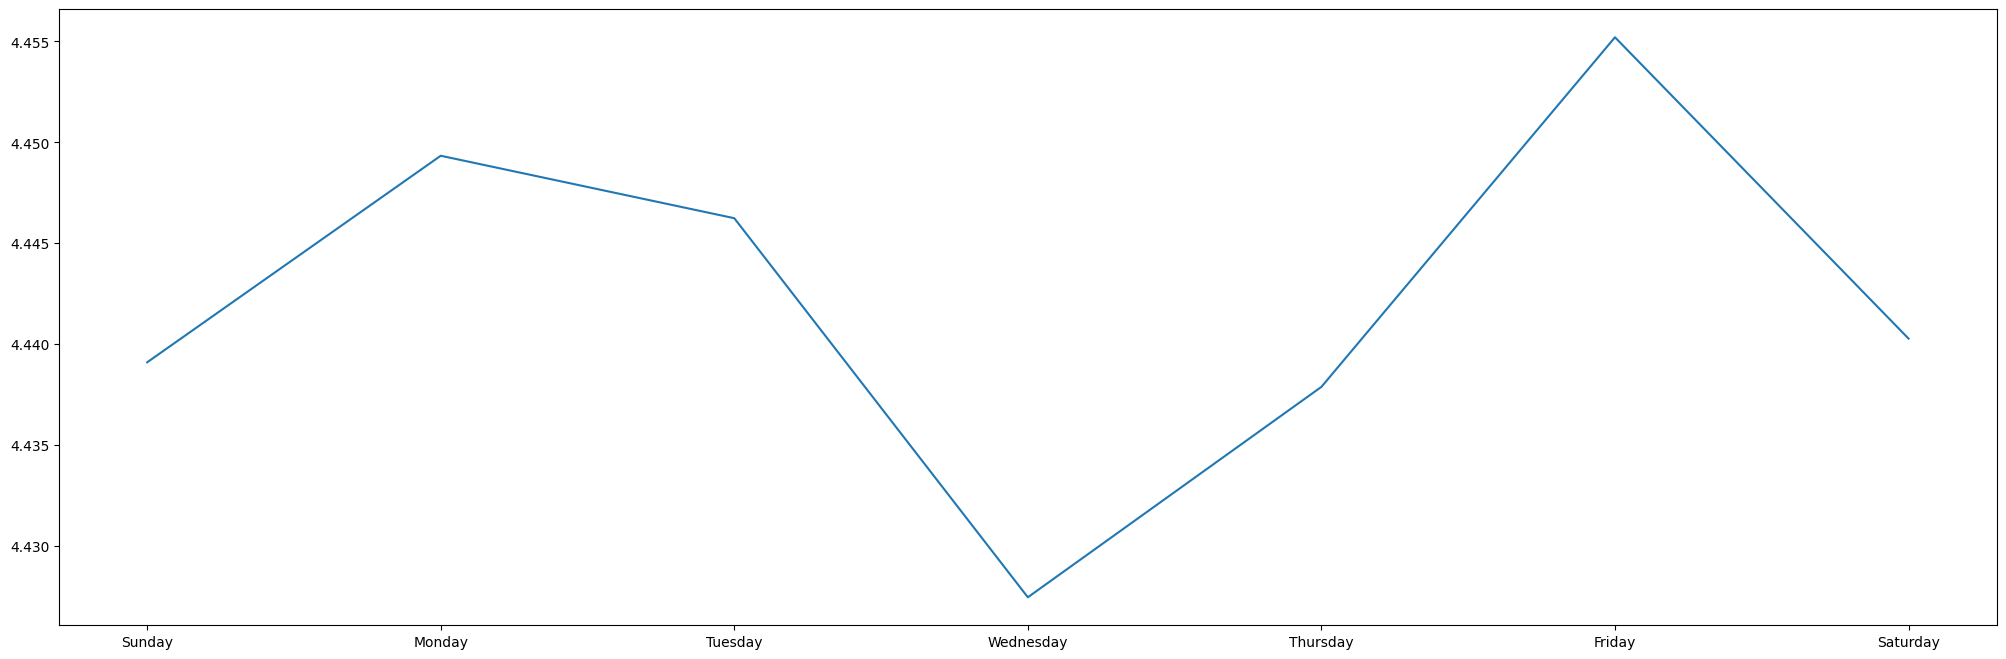

In [8]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_avg = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_avg = weekday_avg.sort_values('Daynumber')

plt.figure(figsize=(25, 8))
plt.plot(weekday_avg.index.get_level_values(0), weekday_avg['Rating'])

### Number of ratings by course

In [9]:
share = data.groupby(['Course Name'])['Rating'].count()

([<matplotlib.patches.Wedge at 0x2959da9e0d0>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609822, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

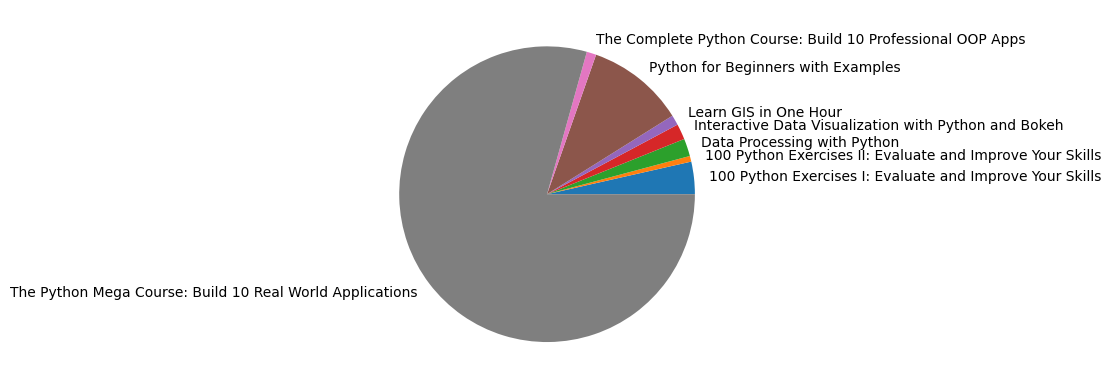

In [10]:
plt.pie(share, labels=share.index)